<a href="https://colab.research.google.com/github/GUSTAVOIVANGQ/AI/blob/main/Simulated_annealing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los valores mínimos encontrados son: x = 3.00192501327816, y = 2.005590386822577
Valor de la función de Himmelblau en estos puntos: 0.0008852786680910701


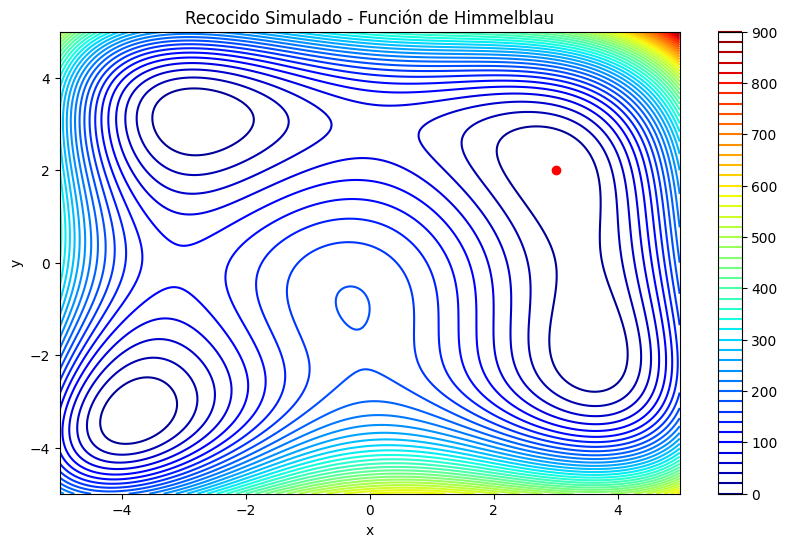

In [4]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Definir la función de Himmelblau
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Función de perturbación (vecino)
def vecino(x, y):
    # Generar un pequeño cambio en x y y
    x_new = x + random.uniform(-0.5, 0.5)
    y_new = y + random.uniform(-0.5, 0.5)
    # Asegurar que los nuevos valores estén dentro del rango [-5, 5]
    x_new = max(min(x_new, 5), -5)
    y_new = max(min(y_new, 5), -5)
    return x_new, y_new

# Función para el recocido simulado
def recocido_simulado(func, x0, y0, temp_inicial, temp_final, alpha):
    x, y = x0, y0
    temp = temp_inicial
    while temp > temp_final:
        # Generar un vecino
        x_new, y_new = vecino(x, y)

        # Calcular la diferencia de energía (cambio
# Calcular la diferencia de energía (cambio en la función objetivo)
        energia_actual = func(x, y)
        energia_nueva = func(x_new, y_new)
        delta_energia = energia_nueva - energia_actual

        # Si la nueva energía es menor, aceptar el nuevo estado
        if delta_energia < 0:
            x, y = x_new, y_new
        else:
            # Si la nueva energía es mayor, aceptarla con una probabilidad que depende de la temperatura
            probabilidad = math.exp(-delta_energia / temp)
            if random.uniform(0, 1) < probabilidad:
                x, y = x_new, y_new

        # Enfriar el sistema (disminuir la temperatura)
        temp *= alpha

    return x, y

# Parámetros iniciales
x0, y0 = random.uniform(-5, 5), random.uniform(-5, 5)  # Valores iniciales aleatorios en el rango [-5, 5]
temp_inicial = 10000  # Temperatura inicial
temp_final = 1e-5  # Temperatura final
alpha = 0.99  # Factor de enfriamiento

# Ejecutar el recocido simulado
x_min, y_min = recocido_simulado(himmelblau, x0, y0, temp_inicial, temp_final, alpha)

# Mostrar los resultados
print(f"Los valores mínimos encontrados son: x = {x_min}, y = {y_min}")
print(f"Valor de la función de Himmelblau en estos puntos: {himmelblau(x_min, y_min)}")

# Graficar la función de Himmelblau y el punto mínimo encontrado
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.plot(x_min, y_min, 'ro')  # Mínimo encontrado
plt.title('Recocido Simulado - Función de Himmelblau')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()